# 0. Project specific imports

In [156]:
import dyn.dyn.datasets.experimental as experimental
import dyn.dyn.datasets.synthetic as synthetic
import dyn.dyn.features.f_fit_functions as qfit
import dyn.dyn.features.optimize_am as optimize_am
import dyn.dyn.features.basic as basic
import dyn.dyn.viz as viz
import numpy as np
import matplotlib.pyplot as plt


viz.init_matplotlib()

# 1. Now, attempt to create and plot a synthetic trajectory between two cells.

## 1.1 Load Osteosarcoma cells

In [200]:
#there are 650 cells in the dataset, so "randomly selecting 650 cells is 
#selecting the whole dataset
n_cells = 650
n_sampling_points = 100

quotient = ["scaling", "rotation"]

cell_indices = np.array([0,10])

import importlib
importlib.reload(experimental)


cells, cell_shapes, labels_a, labels_b = experimental.load_unrandomized_treated_osteosarcoma_cells(
        cell_indices, n_sampling_points=n_sampling_points, quotient=quotient
    )

... Interpolating: Cell boundaries have 100 samplings points.
... Removing potential duplicate sampling points on cell boundaries.

- Cells: quotienting translation.
- Cell shapes: quotienting scaling (length).
- Cell shapes: quotienting rotation.


## 1.2 Generate trajectory

In [206]:
import importlib
importlib.reload(synthetic)

# cell_1 = cell_shapes[0]
# cell_2 = cell_shapes[12]

# cell_1 = cell_shapes[0]
# cell_2 = cell_shapes[10]

cell_1 = cell_shapes[0]
cell_2 = cell_shapes[1]

# cell_1 = cell_shapes[0]
# cell_2 = cell_shapes[20]

a= 1
b=0.5
n_times = 20
n_points=40

trajectory = synthetic.geodesic_between_curves(cell_1,
    cell_2,
    a,
    b,
    degree=1,
    n_times=20,
    noise_var=0.0)

(20,)
(20, 99, 2)


## 1.3 Plot trajectory

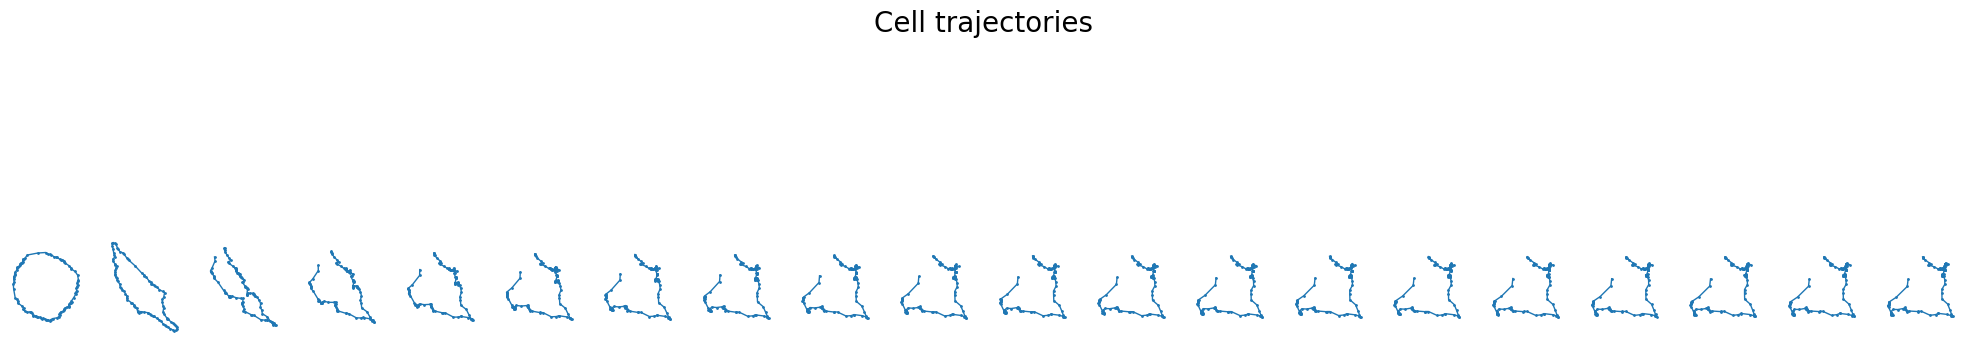

In [207]:
n_traj = 1

fig, axes = plt.subplots(
    n_traj, n_times, figsize=(20, 5), #sharex=True, sharey=True
)

for i_time in range(n_times):
    axes[i_time].plot(
        trajectory[i_time][:, 0], trajectory[i_time][:, 1], 
        marker="o", markersize=1, linewidth=1
    )
    axes[i_time].axis('scaled')
    axes[i_time].axis("off")
#     axes[i_time].set_aspect("equal")

fig.suptitle("Cell trajectories", fontsize=20, y=1.0)
plt.tight_layout()

success.

In [214]:
qfit.ftrans_plot_predictions(trajectory, a=1.2, b=0.5, split=True)

NotImplementedError: f_transform_inverse is only implemented for a / (2b) <= 1.

## Now, repeat with regression model

In [179]:
# import importlib
# importlib.reload(synthetic)

# synthetic.trajectory_between_curves_regression(
#     cell_1, cell_2, a, b, degree=1, n_times=20, n_points=40
# )

# 2.0 Use metric learning code to find a*, m*

In [203]:
import importlib
importlib.reload(optimize_am)

optimize_am.find_best_am(trajectory, init_a = 1, a_lr = 0.05)

n_times: 20
[0 1 2 3 4 5 6 7]
[ 8  9 10 11 12 13 14]
[15 16 17 18 19]
a: 1 r2_val: 1.0 mse_val: 1.2190936057993095e-23 var_val: 20.849201103935354 mse_train: 2.616413375469733e-24
a: 0.9999999999987983 r2_val: 1.0 mse_val: 4.5605524564188906e-20 var_val: 20.849201103933066 mse_train: 6.298943500434262e-21
a: 1.0000000001819747 r2_val: 1.0 mse_val: 1.0593935439625248e-15 var_val: 20.84920110428016 mse_train: 1.4351608684970163e-16
a: 0.9999999722605066 r2_val: 0.9999999999988194 mse_val: 2.461471537045286e-11 var_val: 20.84920105137969 mse_train: 3.33497852894396e-12
a: 1.000004228313228 r2_val: 0.9999999725689274 mse_val: 5.719161710160136e-07 var_val: 20.84920914314556 mse_train: 7.748725913542262e-08
---> DEGREE: 1; BEST A: 1.000004228313228;R2_val: 0.9999999725689274 ; R2_SRV_val: 1.0

a: 1 r2_val: 1.0 mse_val: 1.3113408915875507e-22 var_val: 20.849201103935354 mse_train: 1.3389861508987272e-24
a: 1.0000000000106122 r2_val: 1.0 mse_val: 7.14854948827114e-17 var_val: 20.8492011039554

(1.000004228313228,
 1.0,
 0.9999999725689274,
 array([   0.99999997,  -62.74083493, -117.96536931]),
 array([1., 1., 1.]),
 1.0,
 1.0,
 {0: {'a': [1,
    0.9999999999987983,
    1.0000000001819747,
    0.9999999722605066,
    1.000004228313228],
   'r2_train': [1.0, 1.0, 1.0, 0.9999999999998933, 0.9999999975222922],
   'r2_val': [1.0, 1.0, 1.0, 0.9999999999988194, 0.9999999725689274],
   'mse_train': [2.616413375469733e-24,
    6.298943500434262e-21,
    1.4351608684970163e-16,
    3.33497852894396e-12,
    7.748725913542262e-08],
   'mse_val': [1.2190936057993095e-23,
    4.5605524564188906e-20,
    1.0593935439625248e-15,
    2.461471537045286e-11,
    5.719161710160136e-07]},
  1: {'a': [1,
    1.0000000000106122,
    0.9999999676910433,
    1.0000983974312652,
    0.7003283820639042],
   'r2_train': [1.0,
    1.0,
    0.999999999999935,
    0.9999993980798113,
    0.837932356392769],
   'r2_val': [1.0,
    1.0,
    0.9999999999681983,
    0.9997050341567963,
    -62.74083493438851

In [204]:
import importlib
importlib.reload(optimize_am)

optimize_am.find_best_am(trajectory, init_a = 1.2, a_lr = 0.05)

n_times: 20
[0 1 2 3 4 5 6 7]
[ 8  9 10 11 12 13 14]
[15 16 17 18 19]
a: 1.2 r2_val: -13.874273190403526 mse_val: 1129.7115047685288 var_val: 75.95070295585184 mse_train: 58.08632119530221
a: 0.43783370645608677 r2_val: -2.567321094886021 mse_val: 618.5201821376928 var_val: 173.38506001727188 mse_train: 39.524168019146295
a: 2.8002407330119605 r2_val: -13.993095799056205 mse_val: 1132.3023628998212 var_val: 75.52158527334282 mse_train: 57.106499460377336
a: 3.609585166053021 r2_val: -5.3964690719122945 mse_val: 1032.1988871193914 var_val: 161.37010521193753 mse_train: 31.414698487414316
a: 0.24173307470880978 r2_val: -14.93549861283161 mse_val: 1529.1735973052546 var_val: 95.96019769810847 mse_train: 43.39364757576094
a: 1.6635172374523135 r2_val: -9.139660599370085 mse_val: 1427.9259121953849 var_val: 140.82580952306165 mse_train: 24.395822831736645
---> DEGREE: 1; BEST A: 1.6635172374523135;R2_val: -9.139660599370085 ; R2_SRV_val: 1.0

a: 1.2 r2_val: -146.70815843402093 mse_val: 1121

KeyboardInterrupt: 

In [212]:
import importlib
importlib.reload(optimize_am)

optimize_am.find_best_am(trajectory, init_a = 0.8, a_lr = 0.05)

n_times: 20
[0 1 2 3 4 5 6 7]
[ 8  9 10 11 12 13 14]
[15 16 17 18 19]
a: 0.8 r2_val: -13.952165170367053 mse_val: 1127.031595988941 var_val: 75.3758123420512 mse_train: 56.03657174677194
a: 1.5816022268078318 r2_val: -3.5834052145774544 mse_val: 774.7588527248565 var_val: 169.03564412344497 mse_train: 36.61805920321299
---> DEGREE: 1; BEST A: -1.2641788306186976;R2_val: -13.138713304868643 ; R2_SRV_val: 1.0

a: 0.8 r2_val: -140.8085775924471 mse_val: 10688.9367331015 var_val: 75.3758123420512 mse_train: 22.492169360064775
---> DEGREE: 2; BEST A: -35.061545915188326;R2_val: -31.211977101455872 ; R2_SRV_val: 1.0

a: 0.8 r2_val: -565.0517615638109 mse_val: 42666.61135552133 var_val: 75.3758123420512 mse_train: 18.417723022140862
---> DEGREE: 3; BEST A: -323.97983391541413;R2_val: -113.82534491500239 ; R2_SRV_val: 1.0

best_a: -1.2641788306186976 best_m: 1.0 r2_test: 1.0 r2_SRV_test: 1.0


(-1.2641788306186976,
 1.0,
 -13.138713304868643,
 array([ -13.1387133 ,  -31.2119771 , -113.82534492]),
 array([1., 1., 1.]),
 1.0,
 1.0,
 {0: {'a': [0.8, 1.5816022268078318, -1.2641788306186976],
   'r2_train': [0.2838595902723213, 0.41766717557387945, 0.4226440187384485],
   'r2_val': [-13.952165170367053, -3.5834052145774544, -13.138713304868643],
   'mse_train': [56.03657174677194, 36.61805920321299, 41.51638703831414],
   'mse_val': [1127.031595988941, 774.7588527248565, 1520.3015469875497]},
  1: {'a': [0.8, -35.061545915188326],
   'r2_train': [0.7125528761115008, 0.5373738583927793],
   'r2_val': [-140.8085775924471, -31.211977101455872],
   'mse_train': [22.492169360064775, 34.958727171263504],
   'mse_val': [10688.9367331015, 4628.674961521661]},
  2: {'a': [0.8, -323.97983391541413],
   'r2_train': [0.764623792994855, 0.49625241157801614],
   'r2_val': [-565.0517615638109, -113.82534491500239],
   'mse_train': [18.417723022140862, 39.69203632425079],
   'mse_val': [42666.61